In [1]:
#Mounting Google Drive from Google Colab
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
#Changing the current working directory to the Google Drive
#%cd /content/drive/My Drive/MLDL2024_project1-Enrico

In [3]:
#!pip install -U fvcore

In [4]:
#Importing the necessary libraries
import os
import torch
import numpy as np
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import DataLoader
from datasets.gta5 import GTA5Custom
from datasets.cityscapes import CityscapesCustom
from models.bisenet.build_bisenet import BiSeNet
from train import train_model
from utils import test_latency_FPS, test_FLOPs_params, plot_miou_over_epochs

In [5]:
#Set device agnostic code
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#Set the manual seeds
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

#Set training parameters
gta5_height, gta5_width = (16, 32)
gta5_batch_size = 4

cityscapes_height, cityscapes_width = (16, 32)
cityscapes_batch_size = 4

n_epochs = 30

class_names = ["road", "sidewalk", "building", "wall", "fence", "pole", "traffic_light", "traffic_sign",
                "vegetation", "terrain", "sky", "person", "rider", "car", "truck", "bus", "train",
                "motorcycle", "bicycle"
]

In [6]:
#Create Dataloaders for Cityscapes and GTA5
gta5_dir = os.path.dirname(os.getcwd()) + '/GTA5/GTA5/'
cityscapes_dir = os.path.dirname(os.getcwd()) + '/Cityscapes/Cityspaces/'

gta5_train_dataset = GTA5Custom(gta5_dir, gta5_height, gta5_width, augment=None)
cityscapes_test_dataset = CityscapesCustom(cityscapes_dir, 'val', cityscapes_height, cityscapes_width)

gta5_train_dataloader = DataLoader(gta5_train_dataset, gta5_batch_size, shuffle=True)
cityscapes_test_dataloader = DataLoader(cityscapes_test_dataset, cityscapes_batch_size, shuffle=False)

print(f'GTA5 (Train): {len(gta5_train_dataset)} images, divided into {len(gta5_train_dataloader)} batches of size {gta5_train_dataloader.batch_size}')
print(f'Cityscapes (Test): {len(cityscapes_test_dataset)} images, divided into {len(cityscapes_test_dataloader)} batches of size {cityscapes_test_dataloader.batch_size}')

GTA5 (Train): 2500 images, divided into 625 batches of size 4
Cityscapes (Test): 500 images, divided into 125 batches of size 4


Epoch 1/30  8s]
Train mIoU: 5.09%, Test mIoU: 6.12%
road: 75.56% sidewalk: 0.00% building: 40.61% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 0.00% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.11% bicycle: 0.00% 

Epoch 2/30  7s]
Train mIoU: 6.95%, Test mIoU: 6.45%
road: 77.88% sidewalk: 0.00% building: 29.72% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 14.87% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 3/30  7s]
Train mIoU: 7.40%, Test mIoU: 5.12%
road: 77.80% sidewalk: 0.00% building: 7.94% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 11.47% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 4/30  7s]
Train mIoU: 7.61%, Test mIoU: 5.54%
road: 77.46% sidewalk: 0.00% building: 9.04% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 11.47% person: 0.00% rider: 0.00% car: 7.20% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 5/30  7s]
Train mIoU: 7.49%, Test mIoU: 5.14%
road: 71.99% sidewalk: 0.00% building: 12.78% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 12.94% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 6/30  7s]
Train mIoU: 7.75%, Test mIoU: 6.10%
road: 72.03% sidewalk: 0.00% building: 26.55% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 17.24% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 7/30  7s]
Train mIoU: 8.26%, Test mIoU: 5.85%
road: 75.90% sidewalk: 0.47% building: 20.61% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 14.26% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 8/30  7s]
Train mIoU: 8.36%, Test mIoU: 5.30%
road: 73.59% sidewalk: 0.00% building: 8.62% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 11.56% person: 0.00% rider: 0.00% car: 6.98% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 9/30  7s]
Train mIoU: 8.42%, Test mIoU: 5.13%
road: 70.80% sidewalk: 0.00% building: 9.46% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 2.43% terrain: 0.00% sky: 13.69% person: 0.00% rider: 0.00% car: 1.17% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 10/30  7s]
Train mIoU: 7.93%, Test mIoU: 5.27%
road: 74.29% sidewalk: 0.00% building: 10.03% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 2.76% terrain: 0.00% sky: 13.00% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 11/30  7s]
Train mIoU: 7.36%, Test mIoU: 6.29%
road: 77.99% sidewalk: 0.00% building: 22.29% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 19.25% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 12/30  7s]
Train mIoU: 9.15%, Test mIoU: 6.21%
road: 76.65% sidewalk: 0.00% building: 25.56% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 15.69% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 13/30  7s]
Train mIoU: 8.34%, Test mIoU: 5.61%
road: 73.37% sidewalk: 0.00% building: 18.03% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 15.25% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 14/30  7s]
Train mIoU: 8.40%, Test mIoU: 5.78%
road: 75.05% sidewalk: 0.00% building: 18.39% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 16.34% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 15/30  7s]
Train mIoU: 8.23%, Test mIoU: 5.71%
road: 77.50% sidewalk: 0.00% building: 15.46% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 15.53% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 16/30  7s]
Train mIoU: 8.44%, Test mIoU: 6.00%
road: 76.42% sidewalk: 0.00% building: 20.71% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 16.80% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 17/30  7s]
Train mIoU: 8.61%, Test mIoU: 6.37%
road: 77.52% sidewalk: 0.00% building: 25.61% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 17.81% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 18/30  7s]
Train mIoU: 8.82%, Test mIoU: 6.54%
road: 76.67% sidewalk: 0.00% building: 27.75% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 19.84% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 19/30  7s]
Train mIoU: 8.76%, Test mIoU: 6.43%
road: 76.21% sidewalk: 0.00% building: 27.62% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 18.26% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 20/30  7s]
Train mIoU: 8.74%, Test mIoU: 6.40%
road: 78.10% sidewalk: 1.83% building: 24.49% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 17.15% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 21/30  7s]
Train mIoU: 8.99%, Test mIoU: 6.54%
road: 79.52% sidewalk: 2.28% building: 23.37% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 19.06% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 22/30  7s]
Train mIoU: 9.06%, Test mIoU: 6.86%
road: 77.01% sidewalk: 1.59% building: 29.70% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 21.97% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 23/30  7s]
Train mIoU: 9.11%, Test mIoU: 6.66%
road: 78.59% sidewalk: 1.44% building: 25.74% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 20.70% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 24/30  7s]
Train mIoU: 9.21%, Test mIoU: 6.25%
road: 78.24% sidewalk: 0.00% building: 22.49% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 18.03% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 25/30  8s]
Train mIoU: 9.84%, Test mIoU: 6.22%
road: 77.91% sidewalk: 0.00% building: 22.05% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 18.26% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 26/30  7s]
Train mIoU: 8.87%, Test mIoU: 6.05%
road: 77.61% sidewalk: 0.00% building: 20.01% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 17.43% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 27/30  7s]
Train mIoU: 8.91%, Test mIoU: 6.31%
road: 76.65% sidewalk: 0.00% building: 25.11% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 18.03% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 28/30  7s]
Train mIoU: 9.38%, Test mIoU: 6.68%
road: 77.63% sidewalk: 0.00% building: 29.32% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 19.98% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 29/30  7s]
Train mIoU: 9.08%, Test mIoU: 6.67%
road: 78.10% sidewalk: 0.00% building: 27.55% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 21.01% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 30/30  7s]
Train mIoU: 9.24%, Test mIoU: 6.85%
road: 78.66% sidewalk: 0.00% building: 29.51% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 21.98% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 
Best mIoU: 6.86% at epoch 22
road: 77.01% sidewalk: 1.59% building: 29.70% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 21.97% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

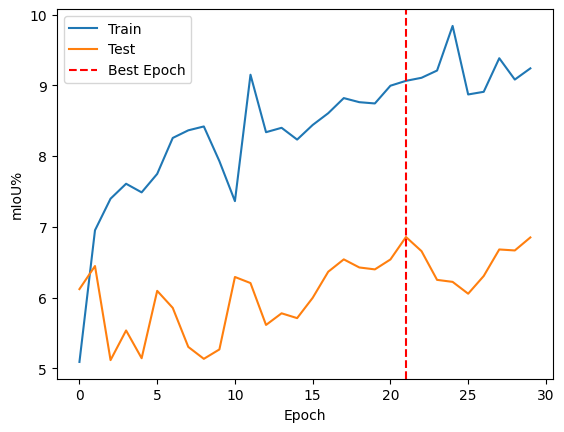

In [7]:
#Testing Domain Shift problem in semantic segmentation

#Set up the model with the pretrained weights
BiSeNet_model = BiSeNet(num_classes=19, context_path='resnet18').to(device)

#Set up the loss function and the optimizer for BiSeNet
BiSeNet_criterion = torch.nn.CrossEntropyLoss(ignore_index=255)
BiSeNet_optimizer = torch.optim.SGD(BiSeNet_model.parameters(), lr=2.5e-2, momentum=0.9, weight_decay=1e-4)

#Train the model
all_train_miou, all_test_miou, best_epoch = train_model(BiSeNet_model, BiSeNet_criterion, BiSeNet_optimizer,
            gta5_train_dataloader, cityscapes_test_dataloader, class_names, device, n_epochs,
            lr_schedule=True, model_name='BiSeNet_shift')

plot_miou_over_epochs(all_train_miou, all_test_miou, best_epoch)

In [8]:
#Create Dataloader for GTA5 with Data Augmentation
augment = transforms.Compose([
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5),
    transforms.GaussianBlur(kernel_size=3)
])

gta5_train_dataset_aug = GTA5Custom(gta5_dir, gta5_height, gta5_width, augment)

gta5_train_dataloader_aug = DataLoader(gta5_train_dataset_aug, gta5_batch_size, shuffle=True)

print(f'GTA5 augmented (Train): {len(gta5_train_dataset_aug)} images, divided into {len(gta5_train_dataloader_aug)} batches of size {gta5_train_dataloader_aug.batch_size}')

GTA5 augmented (Train): 2500 images, divided into 625 batches of size 4


Epoch 1/30  16s]
Train mIoU: 5.08%, Test mIoU: 4.40%
road: 71.60% sidewalk: 0.00% building: 1.43% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 10.54% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 2/30  19s]
Train mIoU: 7.52%, Test mIoU: 4.97%
road: 70.37% sidewalk: 0.00% building: 22.80% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 1.30% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 3/30  18s]
Train mIoU: 7.00%, Test mIoU: 5.70%
road: 75.97% sidewalk: 0.00% building: 28.54% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 3.73% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 4/30  19s]
Train mIoU: 7.87%, Test mIoU: 6.47%
road: 76.32% sidewalk: 0.00% building: 19.76% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 15.21% terrain: 0.00% sky: 11.56% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 5/30  17s]
Train mIoU: 7.65%, Test mIoU: 5.07%
road: 76.18% sidewalk: 0.00% building: 7.57% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 1.67% terrain: 0.00% sky: 10.87% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 6/30  18s]
Train mIoU: 6.92%, Test mIoU: 5.21%
road: 72.42% sidewalk: 0.00% building: 12.44% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 14.21% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 7/30  17s]
Train mIoU: 7.50%, Test mIoU: 5.56%
road: 75.46% sidewalk: 0.00% building: 16.23% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.24% terrain: 0.00% sky: 13.69% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 8/30  17s]
Train mIoU: 6.96%, Test mIoU: 5.29%
road: 77.28% sidewalk: 0.00% building: 9.33% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.81% sky: 13.06% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 9/30  17s]
Train mIoU: 8.15%, Test mIoU: 6.20%
road: 75.67% sidewalk: 0.00% building: 26.18% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 15.86% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 10/30  16s]
Train mIoU: 8.39%, Test mIoU: 5.83%
road: 75.83% sidewalk: 0.00% building: 12.10% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 5.52% terrain: 0.00% sky: 17.40% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 11/30  17s]
Train mIoU: 8.33%, Test mIoU: 5.97%
road: 76.36% sidewalk: 0.00% building: 20.60% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 16.46% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 12/30  16s]
Train mIoU: 8.37%, Test mIoU: 5.73%
road: 77.01% sidewalk: 0.00% building: 17.08% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 14.80% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 13/30  17s]
Train mIoU: 8.16%, Test mIoU: 5.43%
road: 77.10% sidewalk: 0.00% building: 12.38% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 13.76% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 14/30  17s]
Train mIoU: 8.04%, Test mIoU: 5.50%
road: 75.51% sidewalk: 0.00% building: 14.45% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 14.60% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 15/30  19s]
Train mIoU: 8.49%, Test mIoU: 5.70%
road: 75.83% sidewalk: 0.00% building: 17.20% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.60% terrain: 0.00% sky: 14.73% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 16/30  16s]
Train mIoU: 8.75%, Test mIoU: 6.81%
road: 79.03% sidewalk: 0.00% building: 31.16% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 19.21% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 17/30  18s]
Train mIoU: 8.86%, Test mIoU: 6.26%
road: 78.59% sidewalk: 2.13% building: 21.98% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 16.22% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 18/30  20s]
Train mIoU: 8.68%, Test mIoU: 6.39%
road: 77.41% sidewalk: 1.99% building: 24.61% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 17.49% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 19/30  15s]
Train mIoU: 8.68%, Test mIoU: 6.92%
road: 77.51% sidewalk: 3.90% building: 28.84% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 21.22% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 20/30  20s]
Train mIoU: 8.68%, Test mIoU: 6.50%
road: 76.89% sidewalk: 5.56% building: 22.58% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 18.44% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 21/30  18s]
Train mIoU: 8.27%, Test mIoU: 6.55%
road: 77.60% sidewalk: 8.19% building: 21.23% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 17.53% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 22/30  20s]
Train mIoU: 8.62%, Test mIoU: 6.90%
road: 78.92% sidewalk: 9.36% building: 24.07% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 18.82% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 23/30  16s]
Train mIoU: 9.21%, Test mIoU: 7.45%
road: 80.53% sidewalk: 13.77% building: 26.39% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 20.91% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 24/30  16s]
Train mIoU: 9.37%, Test mIoU: 6.60%
road: 79.70% sidewalk: 14.34% building: 16.22% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 15.07% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 25/30  19s]
Train mIoU: 8.72%, Test mIoU: 6.52%
road: 79.60% sidewalk: 5.71% building: 21.38% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 17.19% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 26/30  18s]
Train mIoU: 9.00%, Test mIoU: 6.58%
road: 79.50% sidewalk: 5.22% building: 22.68% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 17.67% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 27/30  19s]
Train mIoU: 8.54%, Test mIoU: 7.07%
road: 79.40% sidewalk: 7.02% building: 26.52% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 21.41% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 28/30  19s]
Train mIoU: 9.33%, Test mIoU: 6.83%
road: 77.42% sidewalk: 6.47% building: 25.98% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 19.93% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 29/30  18s]
Train mIoU: 8.91%, Test mIoU: 7.31%
road: 79.66% sidewalk: 8.46% building: 28.67% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 22.09% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

Epoch 30/30  17s]
Train mIoU: 9.19%, Test mIoU: 7.01%
road: 79.00% sidewalk: 4.23% building: 27.46% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 22.54% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 
Best mIoU: 7.45% at epoch 23
road: 80.53% sidewalk: 13.77% building: 26.39% wall: 0.00% fence: 0.00% pole: 0.00% traffic_light: 0.00% traffic_sign: 0.00% vegetation: 0.00% terrain: 0.00% sky: 20.91% person: 0.00% rider: 0.00% car: 0.00% truck: 0.00% bus: 0.00% train: 0.00% motorcycle: 0.00% bicycle: 0.00% 

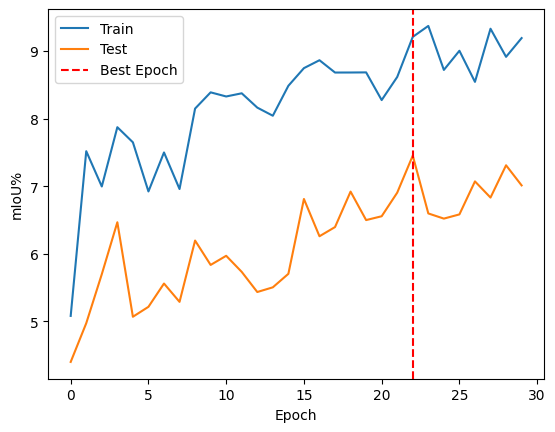

In [9]:
#Testing Data Augmentation to mitigate Domain Shift problem

#Set up the model with the pretrained weights
BiSeNet_model = BiSeNet(num_classes=19, context_path='resnet18').to(device)

#Set up the loss function and the optimizer for BiSeNet
BiSeNet_criterion = torch.nn.CrossEntropyLoss(ignore_index=255)
BiSeNet_optimizer = torch.optim.SGD(BiSeNet_model.parameters(), lr=2.5e-2, momentum=0.9, weight_decay=1e-4)

#Train the model
all_train_miou, all_test_miou, best_epoch = train_model(BiSeNet_model, BiSeNet_criterion, BiSeNet_optimizer,
            gta5_train_dataloader_aug, cityscapes_test_dataloader, class_names, device, n_epochs,
            lr_schedule=True, model_name='BiSeNet_augment')

plot_miou_over_epochs(all_train_miou, all_test_miou, best_epoch)